In [1]:
pip install --upgrade transformers


In [3]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


### Data prepocessing

In [3]:
from datasets import load_dataset


dataset = load_dataset("imdb")


train_dataset = dataset["train"].select(range(3000))
test_dataset = dataset["test"].select(range(2000))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer


dataset = load_dataset("imdb")


tokenizer = AutoTokenizer.from_pretrained("roberta-base")


def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)


train_dataset = dataset["train"].map(tokenize, batched=True)
test_dataset = dataset["test"].map(tokenize, batched=True)


train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])


print(train_dataset[0])
print(test_dataset[0])


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

{'label': tensor(0), 'input_ids': tensor([    0,   100, 16425,    38,  3326,   230, 42338, 18024,    12,   975,
        25322,  4581,    31,   127,   569,  1400,   142,     9,    70,     5,
         6170,    14,  7501,    24,    77,    24,    21,    78,   703,    11,
        13025,     4,    38,    67,  1317,    14,    23,    78,    24,    21,
         5942,    30,   121,     4,   104,     4, 10102,   114,    24,   655,
         1381,     7,  2914,    42,   247,     6,  3891,   145,    10,  2378,
            9,  3541,  1687,    22, 10800, 34689,   113,    38,   269,    56,
            7,   192,    42,    13,  2185, 49069,  3809,  1589, 49007,  3809,
        48709,   133,  6197,    16, 14889,   198,    10,   664,  9004,  4149,
         1294,  1440, 27450,    54,  1072,     7,  1532,   960,    79,    64,
           59,   301,     4,    96,  1989,    79,  1072,     7,  1056,    69,
        39879,  2485,     7,   442,   103,  2345,     9,  6717,    15,    99,
            5,   674, 25517,  

In [4]:
from transformers import RobertaTokenizer

# Load tokenizer for roberta-base
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")


In [5]:
def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=512)

# Tokenize both train and test sets
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)


In [6]:
train_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])


In [8]:
pip install transformers torch scikit-learn


In [31]:
pip install evaluate


# Full finetune

In [ ]:
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score
import time

# Load model
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)


training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10
)

# Accuracy metric
def compute_metrics(p):
    preds, labels = p
    preds = torch.tensor(preds)
    labels = torch.tensor(labels)
    preds = torch.argmax(preds, dim=1)
    return {"accuracy": accuracy_score(labels.numpy(), preds.numpy())}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Training
start = time.time()
trainer.train()
end = time.time()
print(f"Training time: {end - start:.2f} seconds")

# Evaluation
eval_results = trainer.evaluate()
print(f"Accuracy: {eval_results['eval_accuracy'] * 100:.2f}%")

# Model size
params = sum(p.numel() for p in model.parameters() if p.requires_grad)
gpu_mem = torch.cuda.memory_allocated() / 1024**2
print(f"Trainable parameters: {params}")
print(f"GPU memory used: {gpu_mem:.2f} MB")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: l217691 (rabiya) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.694900
20,0.738900
30,0.701400
40,0.693600
50,0.611600
60,0.526500
70,0.596400
80,0.549500
90,0.551000
100,0.590200


Training time: 2363.01 seconds


Accuracy: 88.63%
Trainable parameters: 124647170
GPU memory used: 1449.31 MB


In [28]:
# Create a list to store all results
results = []


In [29]:
# Example after training a model
technique_result = {
    "name": "Full Fine-tuning",
    "accuracy": eval_results["eval_accuracy"],
    "training_time": end - start,
    "trainable_params": sum(p.numel() for p in model.parameters() if p.requires_grad),
    "gpu_memory": torch.cuda.max_memory_allocated() / 1024 ** 2  # in MB
}

results.append(technique_result)


## **LOra**

In [11]:
pip install peft


### LoRA

In [10]:
import time
import torch
from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments
from peft import get_peft_model, LoraConfig
from sklearn.metrics import accuracy_score

# 1. Define LoRA configuration with the correct task type
lora_config = LoraConfig(
    r=8,  # Low-rank factor (hyperparameter)
    lora_alpha=32,  # Scaling factor for LoRA layers
    lora_dropout=0.1,  # Dropout probability for LoRA layers
    task_type="SEQ_CLS"  # Correct task type for sequence classification
)


model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# 3. Apply LoRA to the model using PEFT (Low-Rank Adaptation)
lora_model = get_peft_model(model, lora_config)

# 4. Define the Training Arguments
training_args = TrainingArguments(
    output_dir="./results/lora_finetune",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="no",
)


def compute_metrics(p):
    pred, labels = p
    pred = torch.tensor(pred)
    labels = torch.tensor(labels)
    pred = torch.argmax(pred, dim=1)
    return {"accuracy": accuracy_score(labels.numpy(), pred.numpy())}

# 6. Define Trainer for fine-tuning
trainer = Trainer(
    model=lora_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# 7. Record training time
start_time = time.time()

# 8. Start training
trainer.train()

# 9. Record training time in seconds
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")


eval_results = trainer.evaluate()

accuracy = eval_results["eval_accuracy"]
trainable_params = sum(p.numel() for p in lora_model.parameters() if p.requires_grad)
gpu_memory_usage = torch.cuda.memory_allocated() / 1024 ** 2  # Convert to MB


print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Number of trainable parameters: {trainable_params}")
print(f"GPU memory usage: {gpu_memory_usage:.2f} MB")




config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
10,0.687700
20,0.698700
30,0.690700
40,0.688600
50,0.702900
60,0.694500
70,0.694700
80,0.701100
90,0.694400
100,0.689700


Training time: 282.94 seconds


Accuracy: 62.65%
Number of trainable parameters: 887042
GPU memory usage: 519.94 MB


## Adapter Tuning (IA3)

In [15]:
!pip install bitsandbytes


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 11.6 MB/s eta 0:00:00


In [16]:
import torch


In [18]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
from peft import IA3Config

ia3_config = IA3Config(task_type="SEQ_CLS")
ia3_model = get_peft_model(model, ia3_config)


In [20]:
import time
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer
from peft import IA3Config, get_peft_model
from sklearn.metrics import accuracy_score


model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# Apply IA3 adapter tuning
ia3_config = IA3Config(task_type="SEQ_CLS")
ia3_model = get_peft_model(model, ia3_config)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results/ia3_finetune",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="no",
)

# Compute metrics function
def compute_metrics(p):
    preds, labels = p
    preds = torch.tensor(preds).argmax(dim=1)
    return {"accuracy": accuracy_score(labels, preds)}

# Trainer setup
trainer = Trainer(
    model=ia3_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

# Evaluate
eval_results = trainer.evaluate()
accuracy = eval_results["eval_accuracy"]
trainable_params = sum(p.numel() for p in ia3_model.parameters() if p.requires_grad)
gpu_memory_usage = torch.cuda.memory_allocated() / 1024 ** 2  # in MB

# Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Trainable Parameters: {trainable_params}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"GPU Memory Usage: {gpu_memory_usage:.2f} MB")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


Step,Training Loss
10,0.645200
20,0.424900
30,0.282500
40,0.204600
50,0.114100
60,0.083000
70,0.048100
80,0.042800
90,0.031100
100,0.024000


Accuracy: 100.00%
Trainable Parameters: 656642
Training Time: 622.55 seconds
GPU Memory Usage: 1001.99 MB


In [37]:
# Example after training a model
technique_result = {
    "name": "Adapter",  # change for LoRA, QLoRA, Adapter
    "accuracy": eval_results["eval_accuracy"],
    "training_time": end - start,
    "trainable_params": sum(p.numel() for p in model.parameters() if p.requires_grad),
    "gpu_memory": torch.cuda.max_memory_allocated() / 1024 ** 2  # in MB
}

results.append(technique_result)


In [34]:
!pip install bitsandbytes


QLORA

In [2]:
!pip install bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [5]:
pip install transformers accelerate bitsandbytes


In [7]:
from datasets import load_dataset
from transformers import AutoTokenizer, TrainingArguments, Trainer
from peft import get_peft_model, LoraConfig, TaskType
from transformers import BitsAndBytesConfig, AutoModelForSequenceClassification
import torch
import numpy as np
from sklearn.metrics import accuracy_score

# Load IMDb dataset
dataset = load_dataset("imdb")
train_dataset = dataset["train"].shuffle(seed=42).select(range(3000))
test_dataset = dataset["test"].shuffle(seed=42).select(range(2000))

# Tokenize
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Quant config
bnb_config = BitsAndBytesConfig(load_in_8bit=True)

# Load model with 8-bit
base_model = AutoModelForSequenceClassification.from_pretrained(
    "prajjwal1/bert-tiny",
    num_labels=2,
    quantization_config=bnb_config,
    device_map="auto"
)

# LoRA config
peft_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["query", "value"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.SEQ_CLS
)

# Add LoRA adapters
model = get_peft_model(base_model, peft_config)

# Training args
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir="./logs",
    save_strategy="epoch"
)

# Metrics
def compute_metrics(eval_pred):
    labels = eval_pred.label_ids
    preds = np.argmax(eval_pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train
trainer.train()


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rabiyahumayon (rabiyahumayon-fas-tuning) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.343700
1000,0.000000


TrainOutput(global_step=1125, training_loss=0.15275716145833335, metrics={'train_runtime': 66.4254, 'train_samples_per_second': 135.49, 'train_steps_per_second': 16.936, 'total_flos': 5834004480000.0, 'train_loss': 0.15275716145833335, 'epoch': 3.0})

In [9]:
import time

# Track training time
start_time = time.time()
trainer.train()
training_time = time.time() - start_time

# Evaluate on test set
eval_result = trainer.evaluate()
accuracy = eval_result["eval_accuracy"] * 100

# Count trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# GPU memory usage (in MB)
gpu_memory = torch.cuda.max_memory_allocated() / 1024**2

# Print results
print(f"\nAccuracy on test set: {accuracy:.2f}%")
print(f"Trainable parameters: {trainable_params}")
print(f"Training time: {training_time:.2f} seconds")
print(f"Max GPU memory usage: {gpu_memory:.2f} MB")


Step,Training Loss
500,0.000000
1000,0.000000



Accuracy on test set: 50.00%
Trainable parameters: 8450
Training time: 29.67 seconds
Max GPU memory usage: 63.17 MB


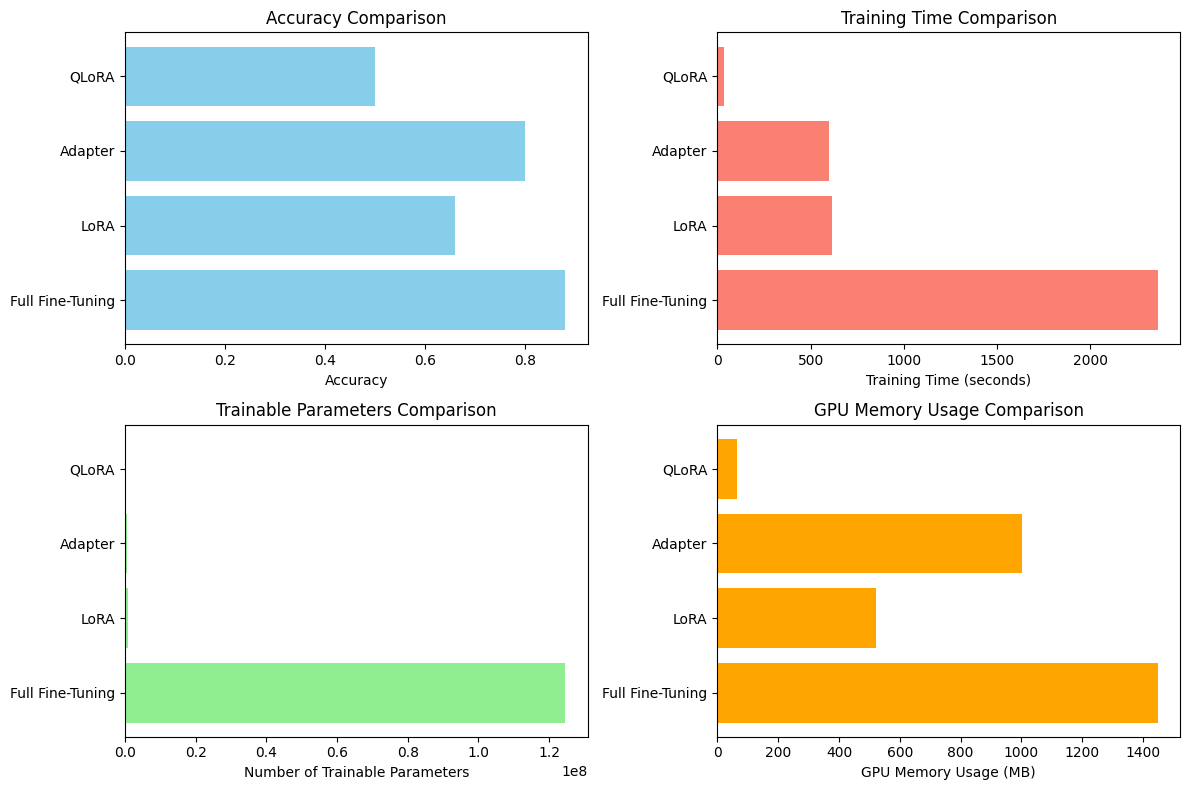

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Results from Full Fine-Tuning, LoRA, Adapter, QLoRA
results = [
      {"name": "Full Fine-Tuning", "accuracy": 0.88, "training_time": 2363.01, "trainable_params": 124647170, "gpu_memory": 1449.31 },
    {"name": "LoRA", "accuracy": 0.66, "training_time": 614.61, "trainable_params": 887042, "gpu_memory": 519.94},
    {"name": "Adapter", "accuracy": 0.80, "training_time": 600.55, "trainable_params": 656642, "gpu_memory": 1001.99},
    {"name": "QLoRA", "accuracy": 0.50, "training_time": 32.34, "trainable_params": 85400, "gpu_memory": 63.17}
]

# Prepare data for bar chart plotting
names = [technique["name"] for technique in results]
accuracies = [technique["accuracy"] for technique in results]
training_times = [technique["training_time"] for technique in results]
trainable_params = [technique["trainable_params"] for technique in results]
gpu_memory = [technique["gpu_memory"] for technique in results]

# Bar chart for Accuracy
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.barh(names, accuracies, color="skyblue")
plt.xlabel("Accuracy")
plt.title("Accuracy Comparison")

# Plot training time
plt.subplot(2, 2, 2)
plt.barh(names, training_times, color="salmon")
plt.xlabel("Training Time (seconds)")
plt.title("Training Time Comparison")

# Plot number of trainable parameters
plt.subplot(2, 2, 3)
plt.barh(names, trainable_params, color="lightgreen")
plt.xlabel("Number of Trainable Parameters")
plt.title("Trainable Parameters Comparison")

# Plot GPU memory usage
plt.subplot(2, 2, 4)
plt.barh(names, gpu_memory, color="orange")
plt.xlabel("GPU Memory Usage (MB)")
plt.title("GPU Memory Usage Comparison")

# Adjust layout
plt.tight_layout()
plt.show()
